In [1]:
import tensorflow as tf 
import numpy as np 
import imageio
import matplotlib.pyplot as plt
from MTRB import MTRB
from GTMB import GTMB
from LTMB import LTMB

In [2]:
tf.compat.v1.disable_eager_execution()

In [3]:
img = imageio.imread('proj_files/train/000000.png')
print(np.shape(img))


(1024, 1024, 3)


In [4]:
output_list = []
d_list_a = (1,2,3,2,1)
d_list_b = (1,2,3,2,1)
d_list_c = (1,2,2,2,1)
# Branch I ############################################################################################
inputs = tf.keras.Input(shape = (1024, 1024, 3), name = "img")
inputs_ = tf.nn.space_to_depth(inputs, 2)
t1 = tf.keras.layers.Conv2D(128, kernel_size = (3, 3), padding = "same", activation = "relu") (inputs_)
t1 = MTRB(t1, d_list_a)
########################################################################################################

# Branch II ###########################################################################################
t2 = tf.keras.layers.ZeroPadding2D(padding=(1,1))(t1)
t2 = tf.keras.layers.Conv2D(128, kernel_size = (3, 3), padding = "valid", activation = "relu", strides = (2, 2)) (t2)
t2 = MTRB(t2, d_list_b)
########################################################################################################

# Branch III ###########################################################################################
t3 = tf.keras.layers.ZeroPadding2D(padding=(1,1))(t2)
t3 = tf.keras.layers.Conv2D(128, kernel_size = (3, 3), padding = "valid", activation = "relu", strides = (2, 2)) (t3)
t3 = MTRB(t3, d_list_c)
# t3 = GTMB(t3)
# t3 = LTMB(t3, d_list_c)
t3 = tf.keras.layers.Conv2D(12, kernel_size = (3, 3), padding = "same") (t3)
t3_out = tf.nn.depth_to_space(t3, 2)
output_list.append(t3_out)
########################################################################################################

# Branch II (cont.) ####################################################################################
_t2 = tf.keras.layers.Concatenate()([t3_out, t2])
_t2 = tf.keras.layers.Conv2D(128, kernel_size = (3, 3), padding = "same", activation = "relu") (_t2)
# _t2 = GTMB(_t2)
_t2 = MTRB(_t2, d_list_b)
# _t2 = GTMB(_t2)
# _t2 = LTMB(_t2, d_list_b)
_t2 = tf.keras.layers.Conv2D(12, kernel_size = (3, 3), padding = "same") (_t2)
t2_out = tf.nn.depth_to_space(_t2, 2)
output_list.append(t2_out)
########################################################################################################

# Branch I (cont.) #####################################################################################
_t1 = tf.keras.layers.Concatenate()([t1, t2_out])
_t1 = tf.keras.layers.Conv2D(128, kernel_size = (3, 3), padding = "same", activation = "relu") (_t1)
# _t1 = GTMB(_t1)
_t1 = MTRB(_t1, d_list_a)
# _t1 = GTMB(_t1) 
# _t1 = LTMB(_t1, d_list_a)
_t1 = tf.keras.layers.Conv2D(12, kernel_size = (3, 3), padding = "same") (_t1)
output = tf.nn.depth_to_space(_t1, 2)
output_list.append(output)
########################################################################################################



In [5]:
model = tf.keras.Model(inputs, output, name = "lbpf")

In [6]:
model.summary()
tf.keras.utils.plot_model(model, "LBPF.png", show_shapes = True)

Model: "lbpf"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
tf_op_layer_SpaceToDepth (Tenso [(None, 512, 512, 12 0           img[0][0]                        
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 128 13952       tf_op_layer_SpaceToDepth[0][0]   
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 64) 73792       conv2d[0][0]                     
_______________________________________________________________________________________________

In [7]:
X_train = np.zeros((100, 1024, 1024, 3)) # Change to 100 when ready to introduce all data
folder = 'proj_files/train/' 
ext = '.png' 

for i in range(10):
    file = folder + '00000' + str(i) + ext 
    print("reading", file)
    X_train[i, :, :, :] = imageio.imread(file)

for i in range(10, 100):
    file = folder + '0000' + str(i) + ext 
    print("reading", file)
    X_train[i, :, :, :] = imageio.imread(file)
    
y_train = np.zeros((100, 1024, 1024, 3)) # Change to 100 when ready to introduce all data
folder = 'proj_files/validation/' 
for i in range(10):
    file = folder + '00000' + str(i) + ext 
    print("reading", file)
    y_train[i, :, :, :] = imageio.imread(file)

for i in range(10, 100):
    file = folder + '0000' + str(i) + ext 
    print("reading", file)
    y_train[i, :, :, :] = imageio.imread(file)


print(X_train.shape)
print(y_train.shape)

reading proj_files/train/000000.png
reading proj_files/train/000001.png
reading proj_files/train/000002.png
reading proj_files/train/000003.png
reading proj_files/train/000004.png
reading proj_files/train/000005.png
reading proj_files/train/000006.png
reading proj_files/train/000007.png
reading proj_files/train/000008.png
reading proj_files/train/000009.png
reading proj_files/train/000010.png
reading proj_files/train/000011.png
reading proj_files/train/000012.png
reading proj_files/train/000013.png
reading proj_files/train/000014.png
reading proj_files/train/000015.png
reading proj_files/train/000016.png
reading proj_files/train/000017.png
reading proj_files/train/000018.png
reading proj_files/train/000019.png
reading proj_files/train/000020.png
reading proj_files/train/000021.png
reading proj_files/train/000022.png
reading proj_files/train/000023.png
reading proj_files/train/000024.png
reading proj_files/train/000025.png
reading proj_files/train/000026.png
reading proj_files/train/000

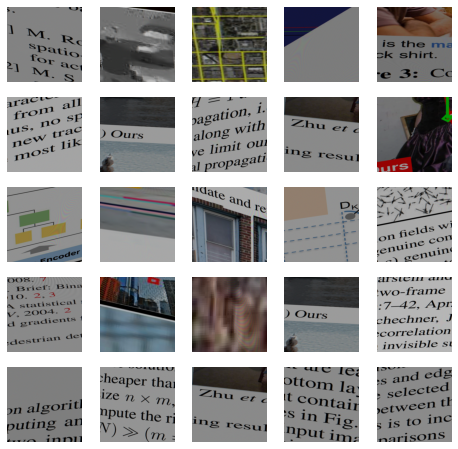

In [8]:
X_train_s = X_train / 255.0

fig1, axes1 = plt.subplots(5, 5, figsize=(8, 8))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X_train_s)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X_train_s[i:i+1][0], cmap = 'viridis')





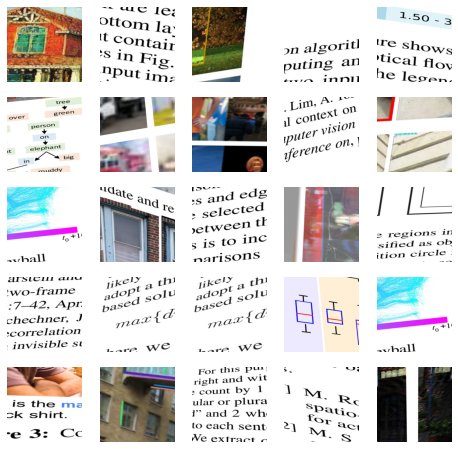

In [9]:
y_train_s = y_train / 255.0

fig1, axes1 = plt.subplots(5, 5, figsize=(8, 8))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(y_train_s)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(y_train_s[i:i+1][0], cmap = 'viridis')

In [10]:
model.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = [tf.keras.metrics.MeanAbsoluteError()])

In [11]:
history = model.fit(x = X_train_s, y = y_train_s, batch_size = 8, epochs = 5)

Train on 100 samples
Epoch 1/5
100/100 [==============================] - 1900s 19s/sample - loss: 1.3263 - mean_absolute_error: 1.3263
Epoch 2/5
100/100 [==============================] - 1889s 19s/sample - loss: 0.1770 - mean_absolute_error: 0.1770
Epoch 3/5
100/100 [==============================] - 1891s 19s/sample - loss: 0.1713 - mean_absolute_error: 0.1713
Epoch 4/5
100/100 [==============================] - 1891s 19s/sample - loss: 0.1500 - mean_absolute_error: 0.1500
Epoch 5/5
100/100 [==============================] - 1888s 19s/sample - loss: 0.1383 - mean_absolute_error: 0.1383


In [21]:
# tf.keras.models.save_model(model, "") not working: ValueError: Unable to save function b'__inference__wrapped_model_20035' because it captures graph tensor Tensor("mul:0", shape=(1, 1, 64, 64), dtype=float32) from a parent function which cannot be converted to a constant with `tf.get_static_value`
model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Warning acquired: /home/ecbm4040/envTF24/lib/python3.6/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument. category=CustomMaskWarning)


In [22]:
model.save_weights("model.h5")


In [23]:
X_test = np.zeros((100, 1024, 1024, 3)) 
folder = 'proj_files/test/' 
ext = '.png' 

for i in range(10):
    file = folder + '00000' + str(i) + ext 
    print("reading", file)
    X_test[i, :, :, :] = imageio.imread(file)

for i in range(10, 100):
    file = folder + '0000' + str(i) + ext 
    print("reading", file)
    X_test[i, :, :, :] = imageio.imread(file)

reading proj_files/test/000000.png
reading proj_files/test/000001.png
reading proj_files/test/000002.png
reading proj_files/test/000003.png
reading proj_files/test/000004.png
reading proj_files/test/000005.png
reading proj_files/test/000006.png
reading proj_files/test/000007.png
reading proj_files/test/000008.png
reading proj_files/test/000009.png
reading proj_files/test/000010.png
reading proj_files/test/000011.png
reading proj_files/test/000012.png
reading proj_files/test/000013.png
reading proj_files/test/000014.png
reading proj_files/test/000015.png
reading proj_files/test/000016.png
reading proj_files/test/000017.png
reading proj_files/test/000018.png
reading proj_files/test/000019.png
reading proj_files/test/000020.png
reading proj_files/test/000021.png
reading proj_files/test/000022.png
reading proj_files/test/000023.png
reading proj_files/test/000024.png
reading proj_files/test/000025.png
reading proj_files/test/000026.png
reading proj_files/test/000027.png
reading proj_files/t

In [24]:
X_test_s = X_test / 255.0

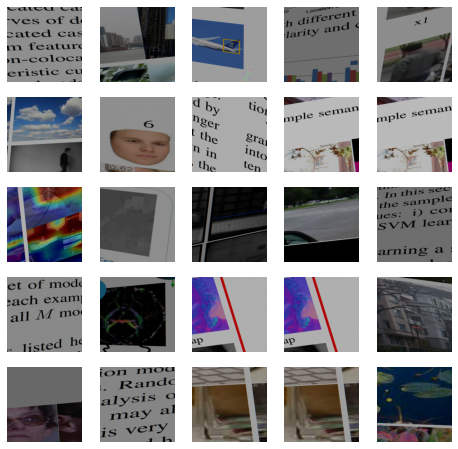

In [25]:
fig, axes1 = plt.subplots(5, 5, figsize=(8, 8))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X_test_s)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X_test_s[i:i+1][0], cmap = 'viridis')

In [26]:
y_test = model.predict(X_test_s)

In [27]:
y_test_s = y_test
print(np.max(y_test))

1.439573


In [28]:
print(np.shape(y_test_s))

(100, 1024, 1024, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

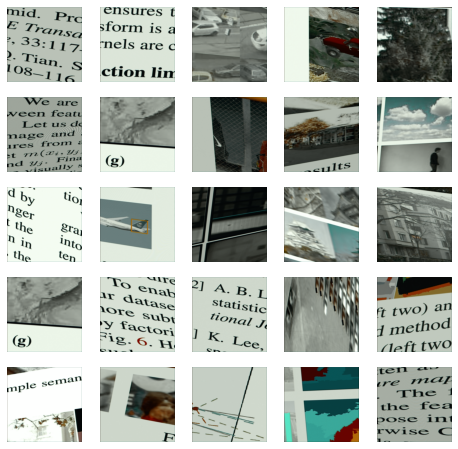

In [29]:
fig, axes1 = plt.subplots(5, 5, figsize=(8, 8))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(y_test_s)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(y_test_s[i:i+1][0], cmap = 'viridis')

In [31]:
import pandas as pd

In [33]:
np.save('y_test', y_test_s)